In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def datasize(f):
    df = pd.read_csv('1d_team_7_train.txt', header=None, delimiter = ' ')
    sample = df.sample(frac=f,random_state=25)
    array = sample.to_numpy(); x = array[:, 0]; y = array[:, 1]
    
    dfx = pd.read_csv('1d_team_7_dev.txt', header=None, delimiter = ' ')
    samplex = dfx.sample(frac=f,random_state=25)
    arrayx = samplex.to_numpy(); xdev = arrayx[:, 0]; ydev = arrayx[:, 1]
    return (x, y, xdev, ydev)

In [3]:
def regression(x, y, M, λ):
    phi = np.zeros((len(x), M))
    for i in range(M):
        phi[:, i] = x**i
    phiT = np.transpose(phi)
    w = np.linalg.inv((phiT@phi + λ*np.identity(M)))@phiT@y
    output = phi@w
    return (w, output)

In [4]:
def sort(x, output):
    sort = np.argsort(x)
    sortx = x[sort]
    sortout = output[sort]
    return (sortx, sortout)   

In [5]:
def check(maxdegree, f, λ):
    (x, y, xdev, ydev) = datasize(f)
    errors = []
    for i in range(2, maxdegree+2):
        (wml, output) = regression(x, y, i, λ)
        phidev = np.zeros((len(xdev), i))
        for j in range(i):
                phidev[:, j] = xdev**j
        outdev = phidev@wml
        error = np.sum((outdev-ydev)**2)
        errors.append(error)
    bestfit = np.argmin(errors)+1
    return bestfit

In [ ]:
print(Bes)

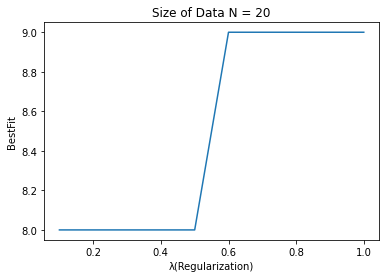

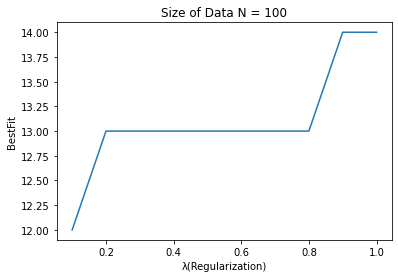

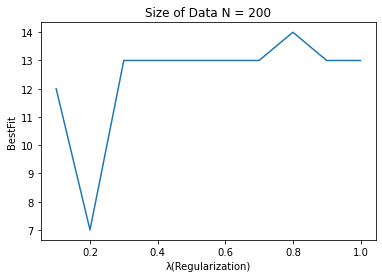

In [6]:
#How λ affects the BestFit for different data sizes
for j in np.array([.1, .5, 1]):
    BestFit = []
    for i in np.linspace(0.1, 1, 10):
        BestFit.append(check(20, j, i))
    plt.plot(np.linspace(0.1, 1, 10), BestFit)
    
    plt.title('Size of Data N = %i' %(200*j)); plt.xlabel('λ(Regularization)'); plt.ylabel('BestFit')
    plt.show()
    

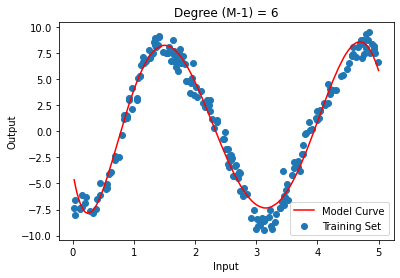

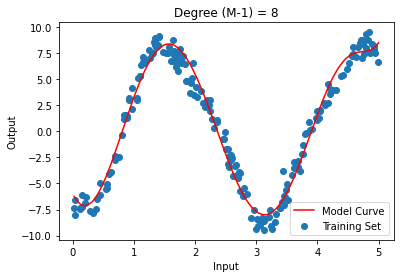

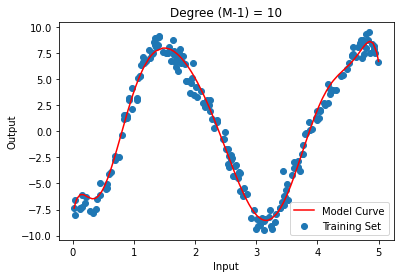

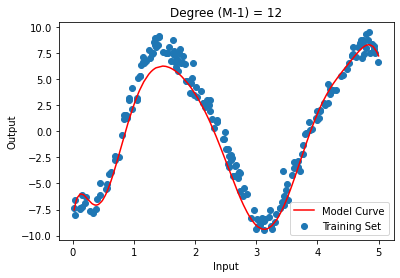

In [7]:
#Variation while changing M (Degree + 1) for a fixed f (fraction of number of training sets) and λ (regularisation)
for j in range(7, 14, 2):
    (x, y, xdev, ydev) = datasize(1)
    (wml, output) = regression(x, y, j, 0)
    (sx, sout) = sort(x, output)
    plt.scatter(xdev, ydev); plt.plot(sx, sout,'r')
    plt.legend(["Model Curve","Training Set"], loc ="lower right")
    plt.title('Degree (M-1) = %i' %(j-1)); plt.xlabel('Input'); plt.ylabel('Output')
    plt.show()

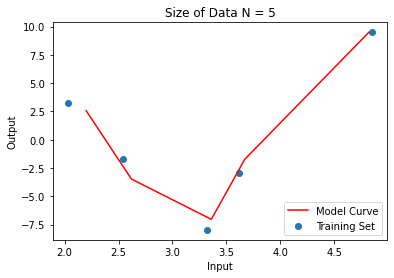

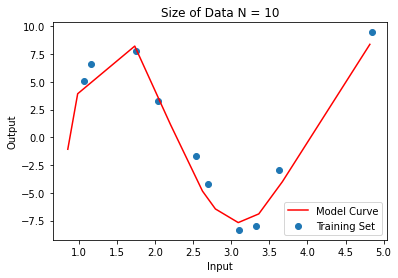

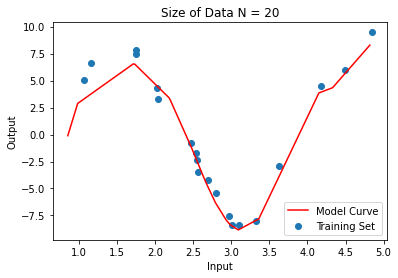

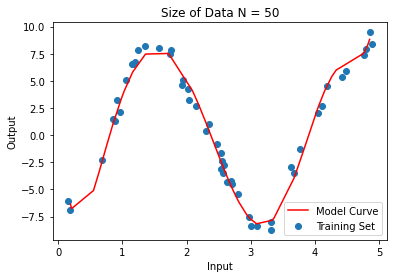

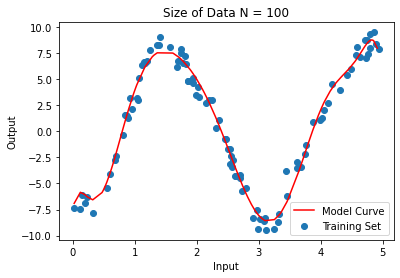

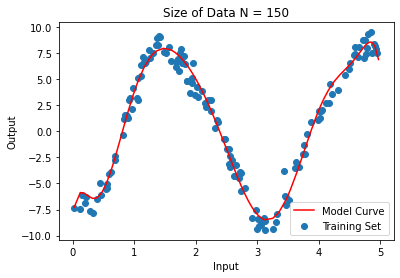

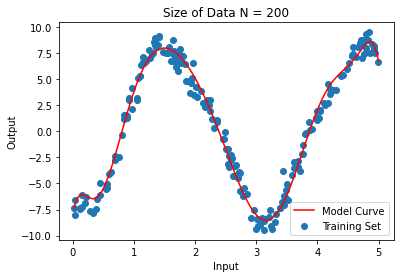

In [8]:
#Variation in the best fit model when varying size of sample data
v = 1/200*np.array([5, 10, 20, 50, 100, 150, 200])
for k in v:
    (x, y, xdev, ydev) = datasize(k)
    (wml, output) = regression(x, y, check(20, k, 0)+1, 0)
    (sx, sout) = sort(x, output)
    plt.scatter(xdev, ydev); plt.plot(sx, sout,'r')
    plt.legend(["Model Curve","Training Set"], loc ="lower right")
    plt.title('Size of Data N = %i' %(200*k)); plt.xlabel('Input'); plt.ylabel('Output')
    plt.show()
    

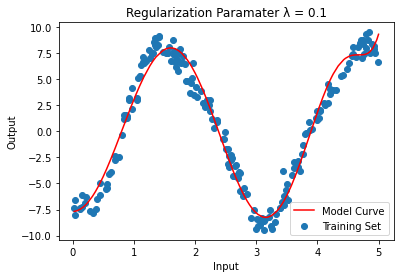

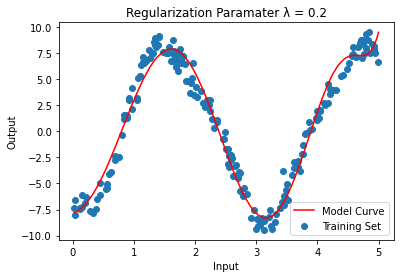

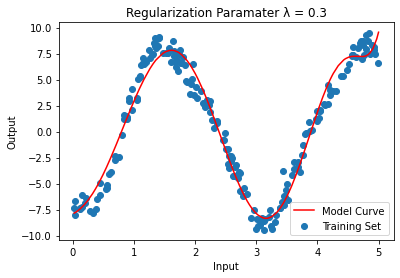

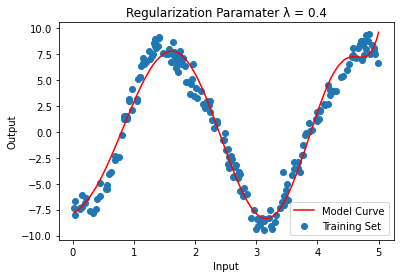

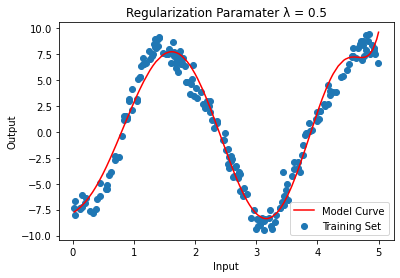

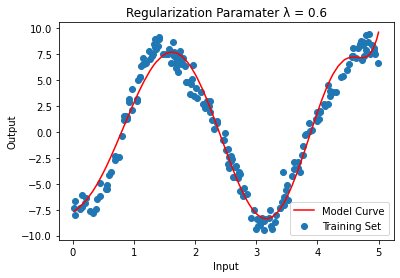

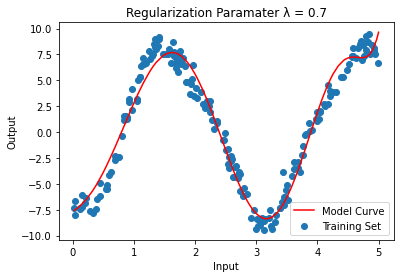

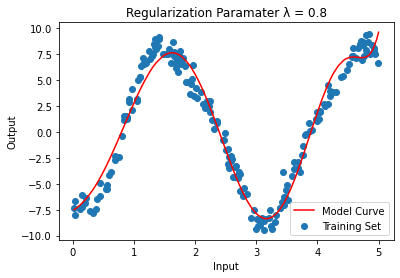

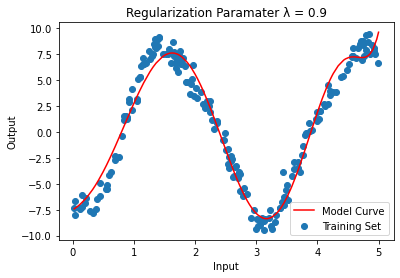

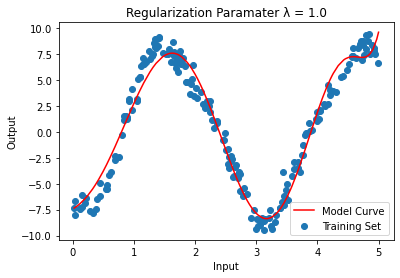

In [9]:
#Variation in best fit model when varying regularization paramter
u = np.linspace(0.1, 1, 10)
for t in u:
    (x, y, xdev, ydev) = datasize(1)
    (wml, output) = regression(x, y, check(20, .2, t)+1, t)
    (sx, sout) = sort(x, output)
    plt.scatter(xdev, ydev); plt.plot(sx, sout,'r')
    plt.legend(["Model Curve","Training Set"], loc ="lower right")
    plt.title('Regularization Paramater λ = %.1f' %t); plt.xlabel('Input'); plt.ylabel('Output')
    plt.show()
    

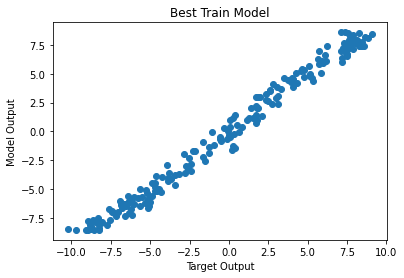

Train Error = 93.345


In [10]:
Best_M = check(20, 1, 0)+1
(wml, ypredict) = regression(x, y, Best_M, 0)
plt.scatter(y, ypredict)
plt.xlabel('Target Output'); plt.ylabel('Model Output')
plt.title('Best Train Model')
plt.show()
print('Train Error = %.3f' %(np.sum((y-ypredict)**2)))

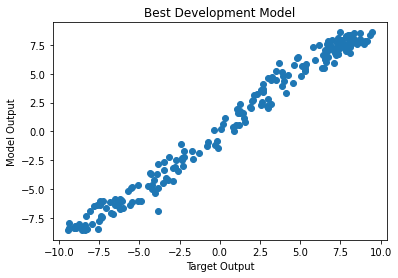

Developmet Error = 129.544


In [11]:
(wml, ypredict) = regression(x, y, Best_M, 0)
phidev = np.zeros((len(x), Best_M))
for i in range(Best_M):
    phidev[:, i] = xdev**i
devpredict = phidev@wml
plt.scatter(ydev, devpredict)
plt.xlabel('Target Output'); plt.ylabel('Model Output')
plt.title('Best Development Model')
plt.show()
print('Developmet Error = %.3f' %(np.sum((ydev-devpredict)**2)))